tensor(0.4507, grad_fn=<MeanBackward0>)
tensor(0.2983, grad_fn=<MeanBackward0>)
tensor(0.2932, grad_fn=<MeanBackward0>)
tensor(0.2909, grad_fn=<MeanBackward0>)
tensor(0.2745, grad_fn=<MeanBackward0>)
tensor(0.2467, grad_fn=<MeanBackward0>)
tensor(0.1850, grad_fn=<MeanBackward0>)
tensor(0.1029, grad_fn=<MeanBackward0>)
tensor(0.0986, grad_fn=<MeanBackward0>)
tensor(0.0969, grad_fn=<MeanBackward0>)
tensor(0.0967, grad_fn=<MeanBackward0>)
tensor(0.0959, grad_fn=<MeanBackward0>)
tensor(0.0822, grad_fn=<MeanBackward0>)
tensor(0.0778, grad_fn=<MeanBackward0>)
tensor(0.0737, grad_fn=<MeanBackward0>)
tensor(0.0718, grad_fn=<MeanBackward0>)
tensor(0.0708, grad_fn=<MeanBackward0>)
tensor(0.0690, grad_fn=<MeanBackward0>)
tensor(0.0638, grad_fn=<MeanBackward0>)
tensor(0.0578, grad_fn=<MeanBackward0>)
tensor(0.0386, grad_fn=<MeanBackward0>)
tensor(0.0386, grad_fn=<MeanBackward0>)
tensor(0.0366, grad_fn=<MeanBackward0>)
tensor(0.0310, grad_fn=<MeanBackward0>)
tensor(0.0296, grad_fn=<MeanBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


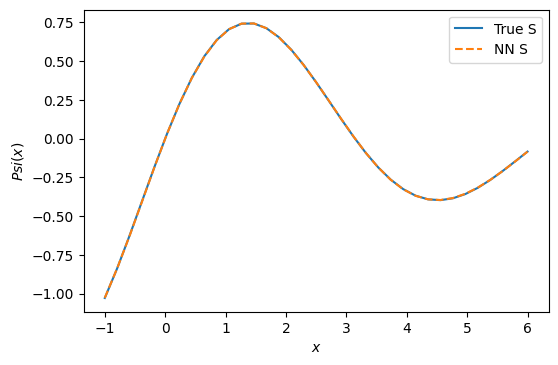

In [ ]:
# First PINN, some of it is document code
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # checking device to use CUDA
N = nn.Sequential(nn.Linear(1, 64), nn.Sigmoid(), nn.Linear(64, 32), nn.Sigmoid(), nn.Linear(32,1, bias=False))  # Custom Architecture
A = 0.
nnf = lambda x: A + x * N(x)  # neural network function
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0
def loss(x):  #loss function

    x.requires_grad = True
    outputs = nnf(x)  # outputs from the neural network
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]   # Predicted function

    return  torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2)   # mean squared error

lowerbound=-1  #lower bound
upperbound = 6  #upper bound
points = 35  #collaction points
x = torch.Tensor(np.linspace(lowerbound, upperbound, points)[:, None])  # linear space to test on
optimizer = torch.optim.LBFGS(N.parameters())
def closure():   #optimization function
    optimizer.zero_grad()
    l = loss(x)  # loss
    l.backward()  #backpropogation
    print(l)  #print loss
    return l

for i in range(10):
    optimizer.step(closure)


linearspace = np.linspace(lowerbound, upperbound, points)[:, None]

with torch.no_grad():
    py = nnf(torch.Tensor(linearspace)).numpy()  #predicted y
ay = np.exp(-linearspace / 5.0) * np.sin(linearspace)  #actual y


#plot
fig, ax = plt.subplots(dpi=100)
ax.plot(linearspace, ay, label='True S')
ax.plot(linearspace, py, '--', label='NN S')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='Best')


In [ ]:
import pickle
torch.save(N, 'model.pt')